#<center> **ANÁLISE DE VOOS ATRASADOS**


# **Bibliotecas**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy import stats
from scipy.stats import norm
import plotly.express as px
from google.colab import drive
from sklearn.cluster import KMeans

# **Conectando ao Google Drive**

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


# **Base de dados**

In [3]:
path_voos = './drive/MyDrive/DataScientist/Voos/airlines_delay.csv'

In [4]:
voos = pd.read_csv(path_voos)
voos.head()

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,2313.0,1296.0,141.0,DL,ATL,HOU,1,0
1,6948.0,360.0,146.0,OO,COS,ORD,4,0
2,1247.0,1170.0,143.0,B6,BOS,CLT,3,0
3,31.0,1410.0,344.0,US,OGG,PHX,6,0
4,563.0,692.0,98.0,FL,BMI,ATL,4,0


# **Análise**

In [5]:
#Transformando os dados qualitativos
df_d = pd.get_dummies(voos)

In [6]:
df_d

,Flight,Time,Length,DayOfWeek,Class,Airline_9E,Airline_AA,Airline_AS,Airline_B6,Airline_CO,...,AirportTo_TXK,AirportTo_TYR,AirportTo_TYS,AirportTo_UTM,AirportTo_VLD,AirportTo_VPS,AirportTo_WRG,AirportTo_XNA,AirportTo_YAK,AirportTo_YUM
0,2313.0,1296.0,141.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6948.0,360.0,146.0,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1247.0,1170.0,143.0,3,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,31.0,1410.0,344.0,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,563.0,692.0,98.0,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539377,6973.0,530.0,72.0,5,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
539378,1264.0,560.0,115.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
539379,5209.0,827.0,74.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
539380,607.0,715.0,65.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
#Distância cosseno
X = df_d.div(df_d.sum(axis=1), axis='rows')
X

,Flight,Time,Length,DayOfWeek,Class,Airline_9E,Airline_AA,Airline_AS,Airline_B6,Airline_CO,...,AirportTo_TXK,AirportTo_TYR,AirportTo_TYS,AirportTo_UTM,AirportTo_VLD,AirportTo_VPS,AirportTo_WRG,AirportTo_XNA,AirportTo_YAK,AirportTo_YUM
0,0.616143,0.345232,0.037560,0.000266,0.000000,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.931242,0.048251,0.019568,0.000536,0.000000,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.485970,0.455963,0.055729,0.001169,0.000000,0.0,0.0,0.0,0.00039,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.017280,0.785953,0.191750,0.003344,0.000000,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.413971,0.508824,0.072059,0.002941,0.000000,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539377,0.919436,0.069884,0.009494,0.000659,0.000132,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
539378,0.649204,0.287622,0.059065,0.002054,0.000514,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
539379,0.851700,0.135219,0.012099,0.000327,0.000164,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
539380,0.435125,0.512545,0.046595,0.002867,0.000717,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## **Definindo quantidade de Clusters**

In [ ]:
distorcoes = []
n_clusters = range(2,11)
for cluster in n_clusters:
  distorcoes.append(KMeans(n_clusters=cluster,max_iter=100,n_init=10).fit(X).inertia_)

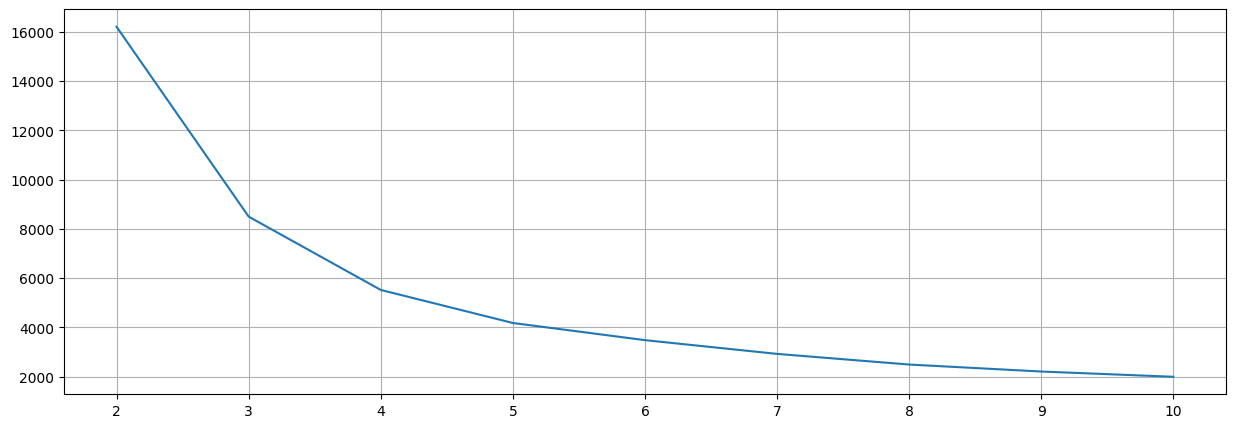

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(n_clusters,distorcoes)
plt.grid()

## **Definindo Clusters**

In [7]:
km = KMeans(n_clusters=3,max_iter=100,n_init=10)
X_t = km.fit_predict(X)
X_t

array([2, 1, 2, ..., 1, 2, 1], dtype=int32)

In [8]:
voos.loc[:,'clus'] = X_t
voos

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class,clus
0,2313.0,1296.0,141.0,DL,ATL,HOU,1,0,2
1,6948.0,360.0,146.0,OO,COS,ORD,4,0,1
2,1247.0,1170.0,143.0,B6,BOS,CLT,3,0,2
3,31.0,1410.0,344.0,US,OGG,PHX,6,0,0
4,563.0,692.0,98.0,FL,BMI,ATL,4,0,2
...,...,...,...,...,...,...,...,...,...
539377,6973.0,530.0,72.0,OO,GEG,SEA,5,1,1
539378,1264.0,560.0,115.0,WN,LAS,DEN,4,1,2
539379,5209.0,827.0,74.0,EV,CAE,ATL,2,1,1
539380,607.0,715.0,65.0,WN,BWI,BUF,4,1,2


## **Gráficos**

### **Perfil Cluster 0**

In [41]:
df_voos = voos[voos.clus==0]
df_voos['Flight'] = df_voos['Flight'].astype(str)
valor_absoluto = df_voos['Flight'].value_counts()
porcentagem = valor_absoluto.apply((lambda x: (x*100)/df_voos['Flight'].value_counts().sum()))
colors = ['#33e0ff','#338aff','#3342ff','#6e33ff','#bb33ff','#d133ff','#e033ff','#ff33fc','#ff33dd','#ff33af','#ff3383','#ff3361']
fig = px.bar(valor_absoluto.head(10),text=[str('{:,.2f}'.format(i)) +' %' for i in (porcentagem.head(10))],color_discrete_sequence=[colors],title='Voos Cluster 0')
fig.update_layout(yaxis={'title':'Quantidade'},
                   xaxis={'title': 'Nº dos Voos'})
fig.show()

<ipython-input-41-ce50593d6291>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [17]:
df_voos = voos[voos.clus==0]
df_voos['Time'] = df_voos['Time'].astype(str)
valor_absoluto = df_voos['Time'].value_counts()
porcentagem = valor_absoluto.apply((lambda x: (x*100)/df_voos['Time'].value_counts().sum()))
colors = ['#33e0ff','#338aff','#3342ff','#6e33ff','#bb33ff','#d133ff','#e033ff','#ff33fc','#ff33dd','#ff33af','#ff3383','#ff3361']
fig = px.bar(valor_absoluto.head(10),text=[str('{:,.2f}'.format(i)) +' %' for i in (porcentagem.head(10))],color_discrete_sequence=[colors],title='Tempo Cluster 0')
fig.update_layout(yaxis={'title':'Quantidade'},
                   xaxis={'title': 'Tempo'})
fig.show()

<ipython-input-17-0061d67f9fc0>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [23]:
df_voos = voos[voos.clus==0]
df_voos['Airline'] = df_voos['Airline'].astype(str)
valor_absoluto = df_voos['Airline'].value_counts()
porcentagem = valor_absoluto.apply((lambda x: (x*100)/df_voos['Airline'].value_counts().sum()))
colors = ['#33e0ff','#338aff','#3342ff','#6e33ff','#bb33ff','#d133ff','#e033ff','#ff33fc','#ff33dd','#ff33af','#ff3383','#ff3361']
fig = px.bar(valor_absoluto.head(10),text=[str('{:,.2f}'.format(i)) +' %' for i in (porcentagem.head(10))],color_discrete_sequence=[colors],title='Airline Cluster 0')
fig.update_layout(yaxis={'title':'Quantidade'},
                   xaxis={'title': 'Companhia Área'})
fig.show()

<ipython-input-23-94bbb566de06>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [19]:
df_voos = voos[voos.clus==0]
df_voos['AirportFrom'] = df_voos['AirportFrom'].astype(str)
valor_absoluto = df_voos['AirportFrom'].value_counts()
porcentagem = valor_absoluto.apply((lambda x: (x*100)/df_voos['AirportFrom'].value_counts().sum()))
colors = ['#33e0ff','#338aff','#3342ff','#6e33ff','#bb33ff','#d133ff','#e033ff','#ff33fc','#ff33dd','#ff33af','#ff3383','#ff3361']
fig = px.bar(valor_absoluto.head(10),text=[str('{:,.2f}'.format(i)) +' %' for i in (porcentagem.head(10))],color_discrete_sequence=[colors],title='AirportFrom Cluster 0')
fig.update_layout(yaxis={'title':'Quantidade'},
                   xaxis={'title': 'Aeroporto Partida'})
fig.show()

<ipython-input-19-ca6b2133a6b7>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [20]:
df_voos = voos[voos.clus==0]
df_voos['AirportTo'] = df_voos['AirportTo'].astype(str)
valor_absoluto = df_voos['AirportTo'].value_counts()
porcentagem = valor_absoluto.apply((lambda x: (x*100)/df_voos['AirportTo'].value_counts().sum()))
colors = ['#33e0ff','#338aff','#3342ff','#6e33ff','#bb33ff','#d133ff','#e033ff','#ff33fc','#ff33dd','#ff33af','#ff3383','#ff3361']
fig = px.bar(valor_absoluto.head(10),text=[str('{:,.2f}'.format(i)) +' %' for i in (porcentagem.head(10))],color_discrete_sequence=[colors],title='AirportTo Cluster 0')
fig.update_layout(yaxis={'title':'Quantidade'},
                   xaxis={'title': 'Aeroporto Chegada'})
fig.show()

<ipython-input-20-67d02dd9e641>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [21]:
df_voos = voos[voos.clus==0]
df_voos['DayOfWeek'] = df_voos['DayOfWeek'].astype(str)
valor_absoluto = df_voos['DayOfWeek'].value_counts()
porcentagem = valor_absoluto.apply((lambda x: (x*100)/df_voos['DayOfWeek'].value_counts().sum()))
colors = ['#33e0ff','#338aff','#3342ff','#6e33ff','#bb33ff','#d133ff','#e033ff','#ff33fc','#ff33dd','#ff33af','#ff3383','#ff3361']
fig = px.bar(valor_absoluto.head(10),text=[str('{:,.2f}'.format(i)) +' %' for i in (porcentagem.head(10))],color_discrete_sequence=[colors],title='DayOfWeek Cluster 0')
fig.update_layout(yaxis={'title':'Quantidade'},
                   xaxis={'title': 'Dia da Semana'})
fig.show()

<ipython-input-21-72a10b0b4884>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### **Perfil Cluster 1**

In [42]:
df_voos = voos[voos.clus==1]
df_voos['Flight'] = df_voos['Flight'].astype(str)
valor_absoluto = df_voos['Flight'].value_counts()
porcentagem = valor_absoluto.apply((lambda x: (x*100)/df_voos['Flight'].value_counts().sum()))
colors = ['#33e0ff','#338aff','#3342ff','#6e33ff','#bb33ff','#d133ff','#e033ff','#ff33fc','#ff33dd','#ff33af','#ff3383','#ff3361']
fig = px.bar(valor_absoluto.head(10),text=[str('{:,.2f}'.format(i)) +' %' for i in (porcentagem.head(10))],color_discrete_sequence=[colors],title='Voos Cluster 1'
            )
fig.show()

<ipython-input-42-522fc0432b31>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [43]:
df_voos = voos[voos.clus==1]
df_voos['Time'] = df_voos['Time'].astype(str)
valor_absoluto = df_voos['Time'].value_counts()
porcentagem = valor_absoluto.apply((lambda x: (x*100)/df_voos['Time'].value_counts().sum()))
colors = ['#33e0ff','#338aff','#3342ff','#6e33ff','#bb33ff','#d133ff','#e033ff','#ff33fc','#ff33dd','#ff33af','#ff3383','#ff3361']
fig = px.bar(valor_absoluto.head(10),text=[str('{:,.2f}'.format(i)) +' %' for i in (porcentagem.head(10))],color_discrete_sequence=[colors],title='Tempo Cluster 1')
fig.update_layout(yaxis={'title':'Quantidade'},
                   xaxis={'title': 'Tempo'})
fig.show()

<ipython-input-43-42fb72a81a1f>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [44]:
df_voos = voos[voos.clus==1]
df_voos['Airline'] = df_voos['Airline'].astype(str)
valor_absoluto = df_voos['Airline'].value_counts()
porcentagem = valor_absoluto.apply((lambda x: (x*100)/df_voos['Airline'].value_counts().sum()))
colors = ['#33e0ff','#338aff','#3342ff','#6e33ff','#bb33ff','#d133ff','#e033ff','#ff33fc','#ff33dd','#ff33af','#ff3383','#ff3361']
fig = px.bar(valor_absoluto.head(10),text=[str('{:,.2f}'.format(i)) +' %' for i in (porcentagem.head(10))],color_discrete_sequence=[colors],title='Airline Cluster 1')
fig.update_layout(yaxis={'title':'Quantidade'},
                   xaxis={'title': 'Companhia Área'})
fig.show()

<ipython-input-44-eaad221ee759>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [45]:
df_voos = voos[voos.clus==1]
df_voos['AirportFrom'] = df_voos['AirportFrom'].astype(str)
valor_absoluto = df_voos['AirportFrom'].value_counts()
porcentagem = valor_absoluto.apply((lambda x: (x*100)/df_voos['AirportFrom'].value_counts().sum()))
colors = ['#33e0ff','#338aff','#3342ff','#6e33ff','#bb33ff','#d133ff','#e033ff','#ff33fc','#ff33dd','#ff33af','#ff3383','#ff3361']
fig = px.bar(valor_absoluto.head(10),text=[str('{:,.2f}'.format(i)) +' %' for i in (porcentagem.head(10))],color_discrete_sequence=[colors],title='AirportFrom Cluster 1')
fig.update_layout(yaxis={'title':'Quantidade'},
                   xaxis={'title': 'Aeroporto Partida'})
fig.show()

<ipython-input-45-1b87f1107b03>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [46]:
df_voos = voos[voos.clus==1]
df_voos['AirportTo'] = df_voos['AirportTo'].astype(str)
valor_absoluto = df_voos['AirportTo'].value_counts()
porcentagem = valor_absoluto.apply((lambda x: (x*100)/df_voos['AirportTo'].value_counts().sum()))
colors = ['#33e0ff','#338aff','#3342ff','#6e33ff','#bb33ff','#d133ff','#e033ff','#ff33fc','#ff33dd','#ff33af','#ff3383','#ff3361']
fig = px.bar(valor_absoluto.head(10),text=[str('{:,.2f}'.format(i)) +' %' for i in (porcentagem.head(10))],color_discrete_sequence=[colors],title='AirportTo Cluster 1')
fig.update_layout(yaxis={'title':'Quantidade'},
                   xaxis={'title': 'Aeroporto Chegada'})
fig.show()

<ipython-input-46-cd9d2689af89>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [47]:
df_voos = voos[voos.clus==1]
df_voos['DayOfWeek'] = df_voos['DayOfWeek'].astype(str)
valor_absoluto = df_voos['DayOfWeek'].value_counts()
porcentagem = valor_absoluto.apply((lambda x: (x*100)/df_voos['DayOfWeek'].value_counts().sum()))
colors = ['#33e0ff','#338aff','#3342ff','#6e33ff','#bb33ff','#d133ff','#e033ff','#ff33fc','#ff33dd','#ff33af','#ff3383','#ff3361']
fig = px.bar(valor_absoluto.head(10),text=[str('{:,.2f}'.format(i)) +' %' for i in (porcentagem.head(10))],color_discrete_sequence=[colors],title='DayOfWeek Cluster 1')
fig.update_layout(yaxis={'title':'Quantidade'},
                   xaxis={'title': 'Dia da Semana'})
fig.show()

<ipython-input-47-2c13ad3c0ead>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### **Perfil Cluster 2**

In [48]:
df_voos = voos[voos.clus==2]
df_voos['Flight'] = df_voos['Flight'].astype(str)
valor_absoluto = df_voos['Flight'].value_counts()
porcentagem = valor_absoluto.apply((lambda x: (x*100)/df_voos['Flight'].value_counts().sum()))
colors = ['#33e0ff','#338aff','#3342ff','#6e33ff','#bb33ff','#d133ff','#e033ff','#ff33fc','#ff33dd','#ff33af','#ff3383','#ff3361']
fig = px.bar(valor_absoluto.head(10),text=[str('{:,.2f}'.format(i)) +' %' for i in (porcentagem.head(10))],color_discrete_sequence=[colors],title='Voos Cluster 2'
            )
fig.show()

<ipython-input-48-a74b1874cda7>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [49]:
df_voos = voos[voos.clus==2]
df_voos['Time'] = df_voos['Time'].astype(str)
valor_absoluto = df_voos['Time'].value_counts()
porcentagem = valor_absoluto.apply((lambda x: (x*100)/df_voos['Time'].value_counts().sum()))
colors = ['#33e0ff','#338aff','#3342ff','#6e33ff','#bb33ff','#d133ff','#e033ff','#ff33fc','#ff33dd','#ff33af','#ff3383','#ff3361']
fig = px.bar(valor_absoluto.head(10),text=[str('{:,.2f}'.format(i)) +' %' for i in (porcentagem.head(10))],color_discrete_sequence=[colors],title='Tempo Cluster 2')
fig.update_layout(yaxis={'title':'Quantidade'},
                   xaxis={'title': 'Tempo'})
fig.show()

<ipython-input-49-b42fb5b2e14d>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [50]:
df_voos = voos[voos.clus==2]
df_voos['Airline'] = df_voos['Airline'].astype(str)
valor_absoluto = df_voos['Airline'].value_counts()
porcentagem = valor_absoluto.apply((lambda x: (x*100)/df_voos['Airline'].value_counts().sum()))
colors = ['#33e0ff','#338aff','#3342ff','#6e33ff','#bb33ff','#d133ff','#e033ff','#ff33fc','#ff33dd','#ff33af','#ff3383','#ff3361']
fig = px.bar(valor_absoluto.head(10),text=[str('{:,.2f}'.format(i)) +' %' for i in (porcentagem.head(10))],color_discrete_sequence=[colors],title='Airline Cluster 2')
fig.update_layout(yaxis={'title':'Quantidade'},
                   xaxis={'title': 'Companhia Área'})
fig.show()

<ipython-input-50-e7d598d83459>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [51]:
df_voos = voos[voos.clus==2]
df_voos['AirportFrom'] = df_voos['AirportFrom'].astype(str)
valor_absoluto = df_voos['AirportFrom'].value_counts()
porcentagem = valor_absoluto.apply((lambda x: (x*100)/df_voos['AirportFrom'].value_counts().sum()))
colors = ['#33e0ff','#338aff','#3342ff','#6e33ff','#bb33ff','#d133ff','#e033ff','#ff33fc','#ff33dd','#ff33af','#ff3383','#ff3361']
fig = px.bar(valor_absoluto.head(10),text=[str('{:,.2f}'.format(i)) +' %' for i in (porcentagem.head(10))],color_discrete_sequence=[colors],title='AirportFrom Cluster 2')
fig.update_layout(yaxis={'title':'Quantidade'},
                   xaxis={'title': 'Aeroporto Partida'})
fig.show()

<ipython-input-51-c1fc02967f71>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [52]:
df_voos = voos[voos.clus==2]
df_voos['AirportTo'] = df_voos['AirportTo'].astype(str)
valor_absoluto = df_voos['AirportTo'].value_counts()
porcentagem = valor_absoluto.apply((lambda x: (x*100)/df_voos['AirportTo'].value_counts().sum()))
colors = ['#33e0ff','#338aff','#3342ff','#6e33ff','#bb33ff','#d133ff','#e033ff','#ff33fc','#ff33dd','#ff33af','#ff3383','#ff3361']
fig = px.bar(valor_absoluto.head(10),text=[str('{:,.2f}'.format(i)) +' %' for i in (porcentagem.head(10))],color_discrete_sequence=[colors],title='AirportTo Cluster 2')
fig.update_layout(yaxis={'title':'Quantidade'},
                   xaxis={'title': 'Aeroporto Chegada'})
fig.show()

<ipython-input-52-82ed7b802db2>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [53]:
df_voos = voos[voos.clus==2]
df_voos['DayOfWeek'] = df_voos['DayOfWeek'].astype(str)
valor_absoluto = df_voos['DayOfWeek'].value_counts()
porcentagem = valor_absoluto.apply((lambda x: (x*100)/df_voos['DayOfWeek'].value_counts().sum()))
colors = ['#33e0ff','#338aff','#3342ff','#6e33ff','#bb33ff','#d133ff','#e033ff','#ff33fc','#ff33dd','#ff33af','#ff3383','#ff3361']
fig = px.bar(valor_absoluto.head(10),text=[str('{:,.2f}'.format(i)) +' %' for i in (porcentagem.head(10))],color_discrete_sequence=[colors],title='DayOfWeek Cluster 2')
fig.update_layout(yaxis={'title':'Quantidade'},
                   xaxis={'title': 'Dia da Semana'})
fig.show()

<ipython-input-53-1dbff60dee0d>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

